<h3>Using ordinary list squares method</h3>
<h4>refer wiki- https://en.wikipedia.org/wiki/Ordinary_least_squares</h4>

In [111]:
def find_slop_intercept(X, Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    
    #total number of values
    m = len(X)
    
    #using formula to calculate slop and intercept
    numer = 0
    denom = 0
    
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    
    slop = numer/denom
    intercept = mean_y - (b1 * mean_x)
    
    #return slop and intercept
    return slop, intercept

def compute_line(X, slop, intercept):
    regression_line = [(slop*xi)+intercept for xi in X]
    
    #return regression_line
    return regression_line

def plot_line(line, X, Y, xlabel="x", ylabel="y"):
    # Ploting regessor Line
    plt.plot(X, line, label='Regression Line')
    # Ploting points
    plt.scatter(X, Y, c='#ef5423', label='Actual Points')
    plt.title("Actual points and regressor line")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

def predict_y(point, slop, intercept):
    return (slop*point)+intercept

def error(X, Y, slop, intercept):
    ypred_list = []
    for xi in X:
        ypred = predict_y(xi, slop, intercept)
        ypred_list.append(ypred)
    MSE_error = 0
    for indx in range(len(ypred_list)):
        err = (Y[indx] - ypred_list[indx]) ** 2
        MSE_error += err
    MSE_error /= len(Y)
    RMSE = math.sqrt(MSE_error)
    return RMSE

In [112]:
import math

Problem 1: <br>
Consider the following set of points: {(-2 , -1) , (1 , 1) , (3 , 2)} <br>
a) Find the least square regression line for the given data points. <br>
b) Plot the given points and the regression line in the same rectangular system of axes. <br>
<br>

slop:  0.61 intercept: 0.26
RMSE: 0.09365858115816937


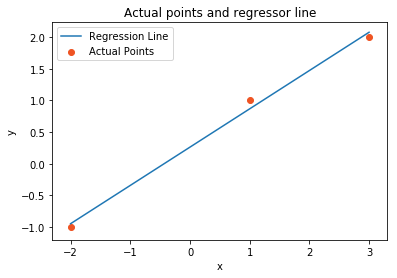

In [113]:
#data point
X = np.array([-2, 1, 3])
Y = np.array([-1, 1, 2])

#compute slop and intercept
slop, intercept = slop_intercept(X, Y)
print("slop: ",round(slop, 2), "intercept:",round(intercept, 2))
#compute line
line = compute_line(X, slop, intercept)

#print MSE
mse = error(X, Y, slop, intercept)
print("RMSE:", mse)

#plotting points and regressor line
plot_line(line, X, Y)

Problem 2:<br>
a) Find the least square regression line for the following set of data
{(-1 , 0),(0 , 2),(1 , 4),(2 , 5)}<br>
b) Plot the given points and the regression line in the same rectangular system of axes. <br>
<br>

slop:  1.7 intercept: 2.45
RMSE: 0.61


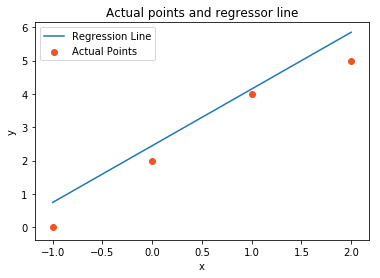

In [114]:
#data point
X = np.array([-1, 0, 1, 2])
Y = np.array([0, 2, 4, 5])

#compute slop and intercept
slop, intercept = slop_intercept(X, Y)
print("slop: ",round(slop, 2), "intercept:",round(intercept, 2))
#compute line
line = compute_line(X, slop, intercept)

#print MSE
mse = error(X, Y, slop, intercept)
print("RMSE:", round(mse,2))

#plotting points and line
plot_line(line, X, Y)

Problem 3:<br>
The values of y and their corresponding values of y are shown in the table below <br>
x  0  1  2  3  4<br>
y  2  3  5  4  6<br>
a) Find the least square regression line y = a x + b. <br>
b) Estimate the value of y when x = 10.<br>


slop:  0.9 intercept: 2.79
Estimated Y for X=10 : 11.79
RMSE: 0.85


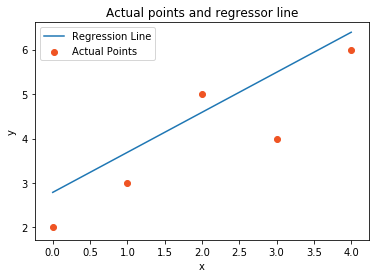

In [115]:
#data point
X = np.array([0, 1, 2, 3, 4])
Y = np.array([2, 3, 5, 4, 6])

#compute slop and intercept
slop, intercept = slop_intercept(X, Y)
print("slop: ",round(slop, 2), "intercept:",round(intercept, 2))
#compute line
line = compute_line(X, slop, intercept)

#y for x = 10
ypred = predict_y(10, slop, intercept)
print("Estimated Y for X=10 :", round(ypred,2))

#print MSE
mse = error(X, Y, slop, intercept)
print("RMSE:", round(mse,2))

#plotting points and line
plot_line(line, X, Y)

Problem 4:<br>
The sales of a company (in million dollars) for each year are shown in the table below. <br>
x (year)  2005  2006  2007  2008  2009<br>
y (sales)  12  19  29  37  45<br>

a) Find the least square regression line y = a x + b. <br>
b) Use the least squares regression line as a model to estimate the sales of the company in 2012.<br>

slop:  1.02 intercept: 0.19
Estimated Y for year(X)=2012: 77.21 Million
RMSE: 0.21


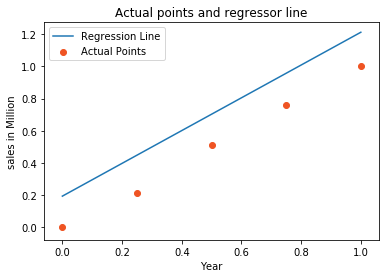

In [116]:
#data point
X = np.array([2005, 2006, 2007, 2008, 2009])
Y = np.array([12, 19, 29, 37, 45])

max_y, min_y = np.max(Y), np.min(Y)
max_x, min_x = np.max(X), np.min(X)

x_norm = [((xi - min_x)/(max_x-min_x)) for xi in X]
y_norm = [((yi - min_y)/(max_y-min_y)) for yi in Y]

#compute slop and intercept
slop, intercept = slop_intercept(x_norm, y_norm)
print("slop: ",round(slop, 2), "intercept:",round(intercept, 2))
#compute line
line = compute_line(x_norm, slop, intercept)

#y for x = 10
xi = 2012
x_test = (xi - min_x)/(max_x - min_x)
ypred = predict_y(x_test, slop, intercept)
y__ = ypred* (max_y - min_y) + min_y
print("Estimated Y for year(X)=2012:", round(y__,2), "Million")

#print MSE
mse = error(x_norm, y_norm, slop, intercept)
print("RMSE:", round(mse,2))

#plotting points and line
plot_line(line, x_norm, y_norm, xlabel="Year", ylabel="sales in Million")